In [1]:
import numpy as np
import pandas as pd
import json

In [2]:
import plotly
import plotly.express as px

In [3]:
from IPython.display import Image, SVG, display

In [4]:
hospital_data = pd.read_csv("../../data/hospitals/hospital_locations.csv")
population_data = pd.read_csv("../../data/general/census_population.csv")

In [5]:
with open("../../data/geography/geojson-counties-fips.json", "r") as f:
    county_shapes = json.load(f)

In [6]:
population_data = population_data[population_data.COUNTY > 0]
population_data.loc[:,"FIPS"] = population_data.apply(lambda row: f"{row.STATE:02d}{row.COUNTY:03d}", axis=1)

In [7]:
hospital_data.replace(to_replace=-999, value=np.nan, inplace=True)

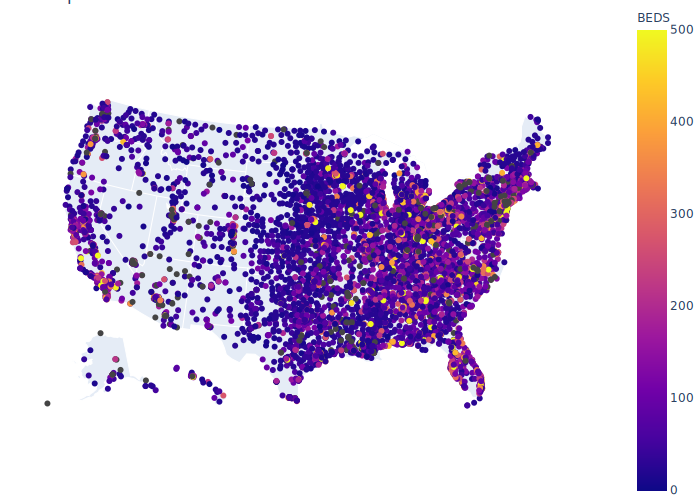

In [8]:
fig = px.scatter_geo(
    hospital_data,
    lat="LATITUDE", lon="LONGITUDE",
    scope="usa", locationmode="USA-states",
    title="Hospital Locations",
    color="BEDS", text="NAME",
    range_color=(0, 500),
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()
img_bytes = fig.to_image(format="svg")
display(SVG(img_bytes))

In [9]:
fig = px.choropleth(
    population_data,
    geojson=county_shapes,
    locations="FIPS",
    color="POPESTIMATE2019",
    scope="usa",
    range_color=(0, 1_000_000),
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()
img_bytes = fig.to_image(format="svg")
display(SVG(img_bytes))